# CS422 Homework4

### Christopher W. Hong

## Recitation Exercises

### Chapter 7

#### Ex. 4

In [6]:
import matplotlib.pyplot as plt
import scipy.special as ss
%matplotlib inline

(a)

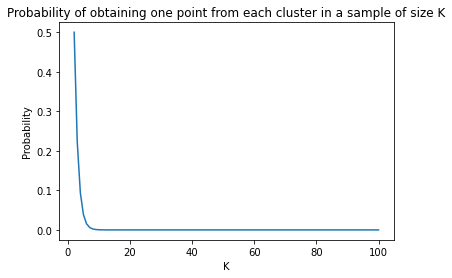

In [11]:
K = range(2, 101)
P = [ss.factorial(k) / k**k for k in K]

plt.plot(K, P)
plt.xlabel('K')
plt.ylabel('Probability')
plt.title('Probability of obtaining one point from each cluster in a sample of size K')
plt.show();

(b)

In [29]:
K = [10, 100, 1000]
P = [(1 - (1 - 1/k)**(2*k))**k for k in K]

for i in range(3):
    print("""For {} clusters, 
    the probability that a sample of size {} contains at least one point from each cluster: {}""".format(K[i], 2 * K[i], P[i]))

For 10 clusters, 
    the probability that a sample of size 20 contains at least one point from each cluster: 0.27355124318833224
For 100 clusters, 
    the probability that a sample of size 200 contains at least one point from each cluster: 5.659896441757136e-07
For 1000 clusters, 
    the probability that a sample of size 2000 contains at least one point from each cluster: 8.236039293409639e-64


#### Ex. 7

(b). An obvious way to reduce the SSE is to find more clusters. In this context, the K is fixed, so more centroids (cluters) should be allocated to the less dense region.

#### Ex. 11

- If the SSE for one variable is low for all clusters, then the variable provides **little discriminant information** in splitting the data into clusters.

- If the SSE for one variable is low for just one cluster, then the variable prvoides **discriminat information** in splitting the data into clusters.

- If the SSE for one variable is high for all clusters, then the variable might be either **a noise or an outlier**.

- If the SSE for one variable is high for just one cluster, then the variable provides **little discriminat information** in defining the cluster.

- We should eliminate variables that provide little discriminant information in splitting the data into clusters such as those low or high SSE for all clusters. It is often useful to eliminate variables that contribute high SSE to one cluster because they can unduly influence clusters and distort centroids. However, those variables should not be eliminated in certain clustering application such as data compression and finacial analysis.

#### Ex. 16

![](16.jpg)

#### Ex. 17

(a) 
- i. Centroids: {18, 45}
    - Cluster 1: {6, 12, 18, 24, 30}; SSE = $(6 - 18)^{2} + (12 - 18)^{2} + (18 - 18)^{2} + (24 - 18)^{2} + (30 - 18)^{2} = 360$
    - Cluster 2: {42, 48}; SSE = $(42 - 45)^{2} + (48 - 45)^{2} = 18$
    - TSS = 378
    
- ii. Centroids: {15, 40}
    - Cluster 1: {6, 12, 18, 24}; SSE = $(6 - 15)^{2} + (12 - 15)^{2} + (18 - 15)^{2} + (24 - 15)^{2} = 180$
    - Cluster 2: {30, 42, 48}; SSE = $(30 - 40)^{2} + (42 - 40)^{2} + (48 - 40)^{2} = 168$
    - TSS = 348
    
(b) Both sets of centroids represent stable solutions.

(c) {6, 12, 18, 24, 30} and {42, 48}.

(d) Single link.

(e) Contiguous.

(f) K-means is not good at handling clusters of different sizes and densities (not compact).

#### Ex. 21

In [41]:
import numpy as np

# Cluster #1
e1 = -(1/693 * np.log2(1/693) * 2 + 11/693 * np.log2(11/693) + 4/693 * np.log2(4/693) + 676/693 * np.log2(676/693))
p1 = 676 / 693

# Cluster #2
e2 = -(27/1562 * np.log2(27/1562) + 89/1562 * np.log2(89/1562) + 333/1562 * np.log2(333/1562) + 827/1562 * np.log2(827/1562) + \
       253/1562 * np.log2(253/1562) + 33/1562 * np.log2(33/1562))
p2 = 827 / 1562

# cluster #3
e3 = -(326/949 * np.log2(326/949) + 465/949 * np.log2(465/949) + 8/949 * np.log2(8/949) + 105/949 * np.log2(105/949) + \
       16/949 * np.log2(16/949) + 29/949 * np.log2(29/949))
p3 = 465/949

# Total
tot_e = 693/3204 * e1 + 1562/3204 * e2 + 949/3204 * e3
tot_p = 693/3204 * p1 + 1562/3204 * p2 + 949/3204 * p3

print('Cluster #1 Entropy:', e1)
print('Cluster #1 Purity:', p1)
print('Cluster #2 Entropy:', e2)
print('Cluster #2 Purity:', p2)
print('Cluster #3 Entropy:', e3)
print('Cluster #3 Purity:', p3)
print('Total Entropy:', tot_e)
print('Total Purity:', tot_p)

Cluster #1 Entropy: 0.19998968538141734
Cluster #1 Purity: 0.9754689754689755
Cluster #2 Entropy: 1.8407475570662515
Cluster #2 Purity: 0.529449423815621
Cluster #3 Entropy: 1.6964096745123298
Cluster #3 Purity: 0.48998946259220233
Total Entropy: 1.4431127706676057
Total Purity: 0.6142322097378278


#### Ex. 22

(a) Yes. The set of points that are uniformly spaced has varying density while the set of points that are uniformly distributed has uniform density.

(b) The set of ponts that are uniformly spaced will have a smaller SSE.

(c) Depending on **Eps** and **MinPts** chosen, DBSCAN will group all points in the uniform data set into one cluster or classify them as noise points. Yet, in the random data set, DBSCAN will merge points in regions with varying density into different number of clusters, i.e. there will be smaller number of cluster in denser regions than that in less dense regions.

## Practicum Problems

### Problem1

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering

#### Import the auto-mpg dataset

In [66]:
# Load the auto-mpg dataset from UCI
auto_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
auto = pd.read_csv(auto_url, delim_whitespace=True, header=None, names=col_names)

In [67]:
auto.shape

(398, 9)

In [68]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [69]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [70]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [71]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### Impute missing value with mean strategy

In [72]:
# Replace ? in hosepower column with NaN
idx = auto[auto['horsepower']=='?'].index
auto.loc[idx, 'horsepower'] = np.nan
auto.horsepower = auto.horsepower.astype('float')

In [73]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [38]:
X.isna().sum()

mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

In [74]:
# Replace the missing values with mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
auto.horsepower = imp_mean.fit_transform(auto[['horsepower']])

In [75]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### Perform hierarchical clustering with average linkage

In [76]:
# Select continuous fields
X = auto[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]

In [77]:
# Perform a Hierarchical Clustering using average linkage wnd 3 clusters
avg_cluster = AgglomerativeClustering(3, linkage='average')
preds = avg_cluster.fit_predict(X)

In [78]:
preds

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,

#### Compare mean and variance of selected variables between cluster assignment and class label

In [83]:
# Extract 3 clusters
preds += 1
labels = []
for i in set(preds):
    label = preds == i
    labels.append(label)

cluster1 = X[labels[0]]
cluster2 = X[labels[1]]
cluster3 = X[labels[2]]

In [93]:
# Calculate the mean and variance for each cluster
for i, cluster in enumerate([cluster1, cluster2, cluster3]):
    print('Mean of Cluster #', i+1, '\n')
    print(cluster.mean(), '\n')
    print('Variance of Cluster #', i)
    print((cluster.std())**2, '\n')
    print('===============================\n')

Mean of Cluster # 1 

mpg               27.365414
displacement     131.934211
horsepower        84.300061
weight          2459.511278
acceleration      16.298120
dtype: float64 

Variance of Cluster # 0
mpg                 41.976309
displacement      2828.083391
horsepower         369.143491
weight          182632.099872
acceleration         5.718298
dtype: float64 


Mean of Cluster # 2 

mpg               13.889062
displacement     358.093750
horsepower       167.046875
weight          4398.593750
acceleration      13.025000
dtype: float64 

Variance of Cluster # 1
mpg                 3.359085
displacement     2138.213294
horsepower        756.521577
weight          74312.340278
acceleration        3.591429
dtype: float64 


Mean of Cluster # 3 

mpg               17.510294
displacement     278.985294
horsepower       124.470588
weight          3624.838235
acceleration      15.105882
dtype: float64 

Variance of Cluster # 2
mpg                 8.829892
displacement     2882.492318
ho

In [95]:
# Extract 3 class
classes = []
for i in set(auto['origin']):
    label = auto.origin == i
    classes.append(label)

class1 = auto[classes[0]]
class2 = auto[classes[1]]
class3 = auto[classes[2]]

In [98]:
# Calculate the mean and variance for each class
for i, c in enumerate([class1, class2, class3]):
    print('Mean of Class #', i+1, '\n')
    print(c[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].mean(), '\n')
    print('Variance of Class #', i)
    print((c[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].std())**2, '\n')
    print('===============================\n')

Mean of Class # 1 

mpg               20.083534
displacement     245.901606
horsepower       118.814769
weight          3361.931727
acceleration      15.033735
dtype: float64 

Variance of Class # 0
mpg                 40.997026
displacement      9702.612255
horsepower        1569.532304
weight          631695.128385
acceleration         7.568615
dtype: float64 


Mean of Class # 2 

mpg               27.891429
displacement     109.142857
horsepower        81.241983
weight          2423.300000
acceleration      16.787143
dtype: float64 

Variance of Class # 1
mpg                 45.211230
displacement       509.950311
horsepower         410.659789
weight          240142.328986
acceleration         9.276209
dtype: float64 


Mean of Class # 3 

mpg               30.450633
displacement     102.708861
horsepower        79.835443
weight          2221.227848
acceleration      16.172152
dtype: float64 

Variance of Class # 2
mpg                 37.088685
displacement       535.465433
horsepo

#### Conclusion

I did not see any clear relationship between cluster assignment and class label. The mean and variance of each variable in the cluster assignment and class label are not even close. Thus, hierarchical clustering with average linkage did not really reveal the structure of the dataset.

### Problem 2

In [117]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the Boston dataset

In [101]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [102]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [107]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [103]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Standardize the data

In [109]:
scaler = StandardScaler()
boston_df_scaled = scaler.fit_transform(boston_df)
boston_df_scaled = pd.DataFrame(boston_df_scaled)
boston_df_scaled.columns = list(boston_df)

In [111]:
boston_df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [112]:
boston_df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


#### Perform KMeans analysis

In [115]:
# Calculate the silhouette score
scores = []
for k in range(2,7):
    kmean = KMeans(k, random_state=0)
    label = kmean.fit_predict(boston_df_scaled)
    score = silhouette_score(boston_df_scaled, label)
    scores.append(score)

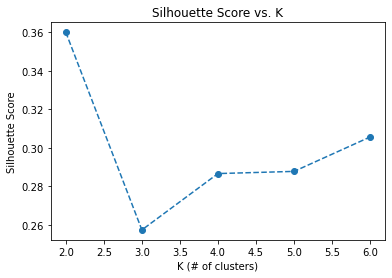

In [119]:
# Plot the silhouette scores and find the optimal k
plt.plot(range(2,7), scores, linestyle='--', marker='o')
plt.xlabel('K (# of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show();

When the boston dataset is splitted into 2 clusters, the silhouette score is the highest.

In [125]:
# Cluter the dataset with optimal K=2
kmean = KMeans(2, random_state=0)
labels = kmean.fit_predict(boston_df_scaled)

In [137]:
# Extract clusters
cluster1 = boston_df_scaled[labels==0]
cluster2 = boston_df_scaled[labels==1]

In [138]:
# Calculate the mean values for all features in each cluster
mean1 = cluster1.mean()
mean2 = cluster2.mean()

In [146]:
# Compare the mean of each cluster to their centroids
for i, mean in enumerate([mean1, mean2]):
    print('Mean of all features in Cluster #', i+1)
    print(mean)
    print()
    print('Centroid coordinate of Cluster #', i+1)
    print(kmean.cluster_centers_[i])
    print()
    print('===========================================\n')

Mean of all features in Cluster # 1
CRIM      -0.390124
ZN         0.262392
INDUS     -0.620368
CHAS       0.002912
NOX       -0.584675
RM         0.243315
AGE       -0.435108
DIS        0.457222
RAD       -0.583801
TAX       -0.631460
PTRATIO   -0.285808
B          0.326451
LSTAT     -0.446421
dtype: float64

Centroid coordinate of Cluster # 1
[-0.39012396  0.26239167 -0.62036759  0.00291182 -0.58467512  0.24331476
 -0.43510819  0.45722226 -0.58380115 -0.63145993 -0.28580826  0.32645106
 -0.44642061]


Mean of all features in Cluster # 2
CRIM       0.725146
ZN        -0.487722
INDUS      1.153113
CHAS      -0.005412
NOX        1.086769
RM        -0.452263
AGE        0.808760
DIS       -0.849865
RAD        1.085145
TAX        1.173731
PTRATIO    0.531248
B         -0.606793
LSTAT      0.829787
dtype: float64

Centroid coordinate of Cluster # 2
[ 0.72514566 -0.48772236  1.15311264 -0.00541237  1.086769   -0.45226302
  0.80876041 -0.8498651   1.0851445   1.1737306   0.53124811 -0.6067932

#### Conclusion

Mean values of all features in each cluster are pretty close to its centroid coordinates.

### Problem3

In [165]:
from sklearn.metrics import homogeneity_score, completeness_score

#### Load the wine dataset

In [148]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [156]:
wine_df = pd.DataFrame(wine.data)
wine_df.columns = wine.feature_names
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [160]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [158]:
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

#### Standardize the wine data

In [159]:
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(wine_df_scaled)
wine_df_scaled.columns = wine.feature_names
wine_df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [161]:
wine_df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


#### Perform KMeans analysis

In [163]:
# Perform KMeans clustering with K=3
kmean = KMeans(3, random_state=0)
preds = kmean.fit_predict(wine_df_scaled)

#### Calculate homogeneity and complete scores

In [166]:
print('Homogeneity score: %.6f' % homogeneity_score(wine.target, preds))
print('Completeness score: %.6f' % completeness_score(wine.target, preds))

Homogeneity score: 0.878843
Completeness score: 0.872964


#### Conclusion

The percentage of homogeneity/completeness score provides that observations with the same class label are in the same cluster. Here the score shows that about 87% of those are in the same cluster.